# Plot for Tests conducted per Million population for different Indian States

Covid19 Tests are dataset provided by Covid19india.org. These Indian states are affected of SARS Covid-19 (aka Corona virus) outbreak. The dataset consist of states and datewise values.

This script fetches the online datasets and parses through them for the required states and plot them in line-plots format.
The plot in the end shows cumulative Tests per Million (TPM) of some states based on date (more states and UTs can be added and subtracted from that list). Last day data of TPM is printed and some other TPM are marked for some dates(last 5th/ 10th day). One can see rate of increase of tests from the plot and also compare it with other states.

TPM of a state = no. of tests conducted / total population of that state

1 million = 10 lakhs

Popoulation of states is based on a dataset provided by : http://www.indiaonlinepages.com/population/india-current-population.html. Although some changes have been done manually to the dataset, so the new dataset is imported directly from the system.

Datasets can be found here: https://api.covid19india.org/csv/. Their official github page is: https://github.com/covid19india/covid19india-react

Note: State name being used in code is compulsorily same as in datasets' column 'State'

In [1]:
# Importing basic libraries
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib
from datetime import datetime, timedelta

### Import and Load Datasets
#### Tests State-wise
In link provided above one can see various datasets in form of comma separated files(csv), we will import for Tests Datewise for States
 *'statewise_tested_numbers_data.csv'*

In [2]:
# Getting the testing dataset
df = pd.read_csv('https://api.covid19india.org/csv/latest/statewise_tested_numbers_data.csv')
df.head()

,Updated On,State,Total Tested,Tag (Total Tested),Positive,Negative,Unconfirmed,Cumulative People In Quarantine,Total People Currently in Quarantine,Tag (People in Quarantine),...,Source1,Unnamed: 17,Source2,Test positivity rate,Tests per thousand,Tests per million,Population NCP 2019 Projection,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,17/04/2020,Andaman and Nicobar Islands,1403.0,Samples Sent,12.0,1210.0,181.0,NaN,NaN,NaN,...,https://t.me/indiacovid/2550,NaN,NaN,0.86%,3.53,3534.0,397000.0,NaN,NaN,NaN
1,24/04/2020,Andaman and Nicobar Islands,2679.0,Samples Sent,27.0,NaN,246.0,NaN,614.0,NaN,...,https://t.me/indiacovid/3147?single,NaN,NaN,1.01%,6.75,6748.0,397000.0,NaN,1000.0,1000000.0
2,27/04/2020,Andaman and Nicobar Islands,2848.0,Samples Sent,33.0,NaN,106.0,NaN,724.0,NaN,...,https://t.me/indiacovid/3365?single,NaN,NaN,1.16%,7.17,7174.0,397000.0,NaN,NaN,NaN
3,01/05/2020,Andaman and Nicobar Islands,3754.0,Samples Sent,33.0,NaN,199.0,NaN,643.0,Institutional,...,https://t.me/indiacovid/3781,NaN,NaN,0.88%,9.46,9456.0,397000.0,NaN,NaN,NaN
4,16/05/2020,Andaman and Nicobar Islands,6677.0,Samples Sent,33.0,NaN,136.0,NaN,16.0,Institutional,...,https://t.me/indiacovid/4925,NaN,NaN,0.49%,16.82,16819.0,397000.0,NaN,NaN,NaN


In [3]:
# Filtering in the required columns
df1 = df[['Updated On','State', 'Total Tested', 'Positive']]
df1

,Updated On,State,Total Tested,Positive
0,17/04/2020,Andaman and Nicobar Islands,1403.0,12.0
1,24/04/2020,Andaman and Nicobar Islands,2679.0,27.0
2,27/04/2020,Andaman and Nicobar Islands,2848.0,33.0
3,01/05/2020,Andaman and Nicobar Islands,3754.0,33.0
4,16/05/2020,Andaman and Nicobar Islands,6677.0,33.0
...,...,...,...,...
1264,16/05/2020,West Bengal,77288.0,2576.0
1265,17/05/2020,West Bengal,85956.0,2677.0
1266,18/05/2020,West Bengal,93570.0,2825.0
1267,19/05/2020,West Bengal,102282.0,2961.0


In [4]:
# Removing the rows with Nan values
refdf1 = df1.dropna()

#### Population
The dataset is in form of table, we will import it directly from the system.

In [5]:
# Importing states population csv file from local directory
Popdf = pd.read_csv('India States Population.csv')
Popdf.head()

,State,Population
0,Uttar Pradesh,237095024
1,Maharashtra,128466921
2,Bihar,126750326
3,West Bengal,102741588
4,Andhra Pradesh,53206421


### Function for Parsing Data

The tests dataset consist of all states, so we need to separate them as required. 

#### FetchState Function

*Params*: State Name 

*Returns*: Single dataframe of State's datewise cumulative tests value

Checkout the example for 'Himachal Pradesh' state.

In [6]:
# Function creates a dataframe for a particular state
def fetchState(State):
    
    Statedf = refdf1.loc[refdf1['State'] == State]
        
    return Statedf

In [7]:
HP = fetchState('Himachal Pradesh')
HP.head()

,Updated On,State,Total Tested,Positive
420,10/04/2020,Himachal Pradesh,900.0,30.0
421,11/04/2020,Himachal Pradesh,900.0,30.0
422,12/04/2020,Himachal Pradesh,1113.0,32.0
423,13/04/2020,Himachal Pradesh,1210.0,32.0
424,14/04/2020,Himachal Pradesh,1311.0,32.0


### Function for creating states TPM Dataframe

*Params*: List of States

*Returns*: Dataframe of the States

The function gives 4 column dataframe with each states' cumulative Tests per million data (last 0/5/10 th day). Function also prints the dataframe

In [8]:
# Function takes in a list of states and returns a datrame with their Tests per Million conducted in last/last5/ last 10 days 
def Last10day(los):
    
    noc = len(los)
    StateTPMlist = []
    
    # getting the last 0/5/10 days dates
    lastday = (datetime.now() - timedelta(days = 1)).strftime('%d/%m/%Y')
    last5day = (datetime.now() - timedelta(days = 6)).strftime('%d/%m/%Y')
    last10day = (datetime.now() - timedelta(days = 11)).strftime('%d/%m/%Y')
    
    for j in range(noc): 
        
        Statedata = fetchState(los[j])
        
        Statepopulation = (Popdf.loc[Popdf['State'] == los[j]]).iloc[0,1]
                
        TPM1 = (Statedata.loc[Statedata['Updated On'] == lastday]).iloc[0,2]/(Statepopulation/1000000)
        TPM2 = (Statedata.loc[Statedata['Updated On'] == last5day]).iloc[0,2]/(Statepopulation/1000000) 
        TPM3 = (Statedata.loc[Statedata['Updated On'] == last10day]).iloc[0,2]/(Statepopulation/1000000) 
        
        StateTPMlist.append([los[j], TPM1, TPM2, TPM3])
        
        TPMdf = pd.DataFrame(StateTPMlist, columns = ['Name', lastday, last5day, last10day])
    
    print(TPMdf)
    return TPMdf
        

### Function to plot TPM data

*Params*: List of states

*Returns*: None

Function plots the TPM data in form of horizontal lines, with states on y-axis and TPM on x-axis. Special markings have been made for each state for their 3 TPM values for past 0/5/10 dates. 

In [9]:
# Function takes in the list of states to be plotted
def PlotTPM(loc):
    
    States_Dataframe = Last10day(loc)
    yrange = np.arange(States_Dataframe.shape[0])
    
    fig1, ax1 = plt.subplots(figsize=(18,10))
    
    ax1.hlines(y= yrange, xmin=0, xmax=States_Dataframe.iloc[:,1], color='#007acc', alpha=0.2, linewidth=2)
    
    # plotting all the TPM data points 
    ax1.plot(States_Dataframe.iloc[:,3], yrange, "o", markersize=10, mfc='Green',  label = datetime.strptime(States_Dataframe.columns[3],'%d/%m/%Y').strftime("%d %B") )
    ax1.plot(States_Dataframe.iloc[:,2], yrange, "o", markersize=10, mfc='Yellow', label = datetime.strptime(States_Dataframe.columns[2],'%d/%m/%Y').strftime("%d %B") )
    ax1.plot(States_Dataframe.iloc[:,1], yrange, "o", markersize=10, mfc='Indigo', label = datetime.strptime(States_Dataframe.columns[1],'%d/%m/%Y').strftime("%d %B") )
    
    # showing the TPM value for last day 
    for i in range(len(loc)):
        TPM1 = States_Dataframe.iloc[i][1]
        plt.text(TPM1 + TPM1/10, i, math.ceil(TPM1*100)/100, color='black', fontsize = 12, va = 'center', ha = 'left')
        
    # Plot Formatting
    
    ax1.set_xscale('log')
    ax1.set_xlabel('Tests per Million (log scaling)', fontsize = 14, color = '#333F4B')
    ax1.set_ylabel('')
    ax1.set_title('Test per Million in some Indian States as of ' + datetime.strptime(States_Dataframe.columns[1],'%d/%m/%Y').strftime("%d %B %Y"), fontsize=16, color = '#333F4B') 
    
    ax1.set_xticks([25, 50, 100, 200, 400, 800, 1600, 3200, 6400, 12800])
    ax1.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

    ax1.get_xaxis().set_tick_params(which='minor', size=0)
    ax1.get_xaxis().set_tick_params(which='minor', width=0)
    
    ax1.set_yticks(yrange)
    ax1.set_yticklabels(States_Dataframe['Name'], fontsize=14, color = '#333F4B')
    
    ax1.invert_yaxis() 
    ax1.legend(loc="upper right", ncol = 3, fontsize = 14)

    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    
    plt.savefig('TestperMillion.png')
    
    # --- Function Ends Here ---


List of states has been made to pass in the function for plotting. One can add more states and UTs to it (or reduce).

In [10]:
list_of_states = ['Bihar', 'Uttar Pradesh', 'West Bengal', 'Madhya Pradesh', 'Kerala', 
                  'Punjab', 'Gujarat', 'Karnataka', 'Odisha', 'Maharashtra', 'Rajasthan', 
                  'Tamil Nadu', 'Andhra Pradesh', 'Jammu and Kashmir', 'Delhi']

### Finally the Plot

The plot is preceded by dataframe of the states passed. Also check image of the plot, saved in your system.

                 Name   20/05/2020   15/05/2020   10/05/2020
0               Bihar   420.993000   336.448839   257.750816
1       Uttar Pradesh   806.275884   671.806592   548.113570
2         West Bengal  1080.399886   676.872933   422.555275
3      Madhya Pradesh  1403.196595  1090.706223   837.580654
4              Kerala  1382.087151  1201.521534  1066.652514
5              Punjab  1847.335245  1577.419591  1310.607519
6             Gujarat  2247.870115  1787.689554  1586.828073
7           Karnataka  2366.951157  1897.807163  1522.954626
8              Odisha  2232.624159  1726.819292  1260.138152
9         Maharashtra  2393.884726  1953.016372  1755.502492
10          Rajasthan  3338.772792  2669.421487  2092.417477
11         Tamil Nadu  4352.733971  3664.116438  2937.987842
12     Andhra Pradesh  5029.693691  4125.253980  3265.301382
13  Jammu and Kashmir  6865.592640  4734.598883  3170.496336
14              Delhi  7443.886287  6200.960064  4646.670743


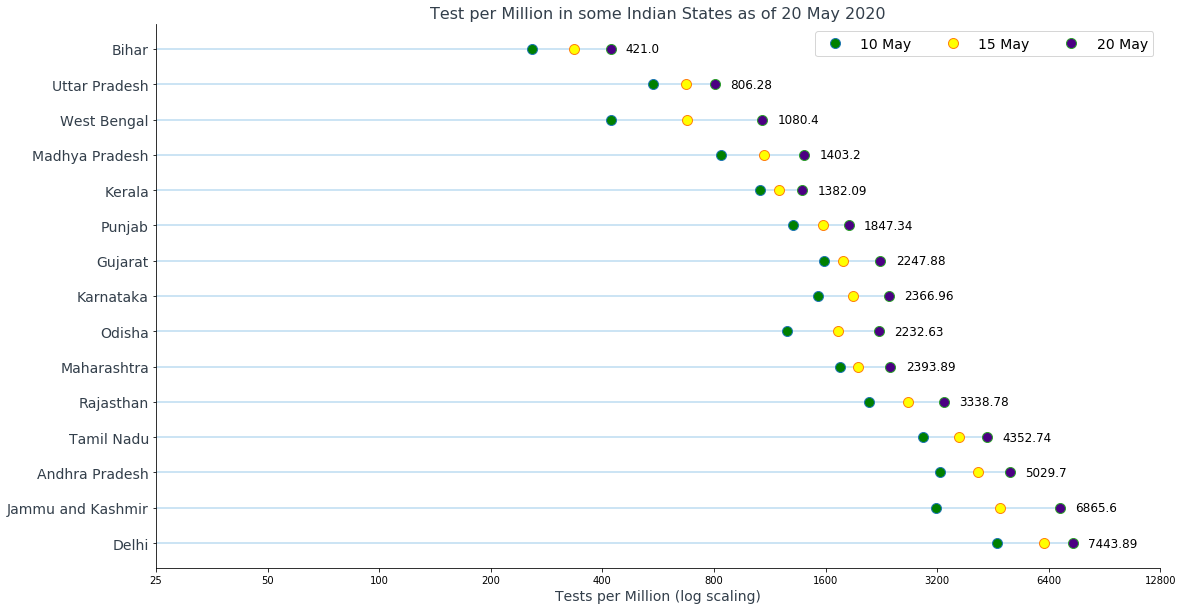

In [11]:
PlotTPM(list_of_states)